In [ ]:
#mount drive

%cd ..
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Projets/YOLO_V8_and_ByteTrack

/content/drive/MyDrive/Projects
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1-0yk9GxTv936WDma10Kpm2OE1NFUwUyg/YOLO_V8_and_ByteTrack


##Check if we are using GPU

In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


##Getting the video

In [ ]:
%cd /content/drive/MyDrive/Projets/YOLO_V8_and_ByteTrack/Video/MOT15/train/ETH-Sunnyday

/content/drive/.shortcut-targets-by-id/1-HgngHIdnEiP4Of5HO0FAN8GEYpbX4fQ/MOT15/train/ETH-Sunnyday


In [ ]:
import cv2
import os
from PIL import Image
# Set input/output directories
dataset_path='/content/drive/MyDrive/Projets/YOLO_V8_and_ByteTrack/Video/MOT15/train/KITTI-13/'
out_video_name = 'KITTI-13.mp4'
#to modify for all new video
####



path = dataset_path+'img1'
out_path = dataset_path+'Video'

           
out_video_full_path = os.path.join(out_path, out_video_name)

pre_imgs = os.listdir(path)
sorted_imgs = sorted(pre_imgs)  # Sort the image files

img_paths = [os.path.join(path, img) for img in sorted_imgs]

cv2_fourcc = cv2.VideoWriter_fourcc(*'mp4v')

frame = cv2.imread(img_paths[0])

if frame is None:
    raise ValueError(f"Failed to read the image: {img_paths[0]}")

size = list(frame.shape[:2])
size.reverse()

video = cv2.VideoWriter(out_video_full_path, cv2_fourcc, 24, size) #output video name, fourcc, fps, size

for img_path in img_paths: 
    frame = cv2.imread(img_path)

    if frame is None:
        print(f"Failed to read the image: {img_path}")
        continue

    video.write(frame)
    print('Processed image:', img_path)

video.release()
print('Outputted video to:', out_video_full_path)


Processed image: /content/drive/MyDrive/Projets/YOLO_V8_and_ByteTrack/Video/MOT15/train/KITTI-13/img1/KITTI-13_000001.jpg
Processed image: /content/drive/MyDrive/Projets/YOLO_V8_and_ByteTrack/Video/MOT15/train/KITTI-13/img1/KITTI-13_000002.jpg
Processed image: /content/drive/MyDrive/Projets/YOLO_V8_and_ByteTrack/Video/MOT15/train/KITTI-13/img1/KITTI-13_000003.jpg
Processed image: /content/drive/MyDrive/Projets/YOLO_V8_and_ByteTrack/Video/MOT15/train/KITTI-13/img1/KITTI-13_000004.jpg
Processed image: /content/drive/MyDrive/Projets/YOLO_V8_and_ByteTrack/Video/MOT15/train/KITTI-13/img1/KITTI-13_000005.jpg
Processed image: /content/drive/MyDrive/Projets/YOLO_V8_and_ByteTrack/Video/MOT15/train/KITTI-13/img1/KITTI-13_000006.jpg
Processed image: /content/drive/MyDrive/Projets/YOLO_V8_and_ByteTrack/Video/MOT15/train/KITTI-13/img1/KITTI-13_000007.jpg
Processed image: /content/drive/MyDrive/Projets/YOLO_V8_and_ByteTrack/Video/MOT15/train/KITTI-13/img1/KITTI-13_000008.jpg
Processed image: /conten

In [ ]:
SOURCE_VIDEO_PATH = dataset_path+"Video/"+out_video_name 

## Install YOLOv8


In [ ]:
# Pip install method (recommended)

# if you encounter a problem with the ultralytics version used, run the next two lines
#!pip install --upgrade ultralytic
#!pip uninstall ultralytics

!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from IPython import display
display.clear_output()


import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/107.7 GB disk)


## Install ByteTrack

In [ ]:
%cd /content/drive/MyDrive/Projets/YOLO_V8_and_ByteTrack

/content/drive/.shortcut-targets-by-id/1-0yk9GxTv936WDma10Kpm2OE1NFUwUyg/YOLO_V8_and_ByteTrack


In [ ]:
#!git clone https://github.com/ifzhang/ByteTrack.git

In [ ]:

%cd "/content/drive/MyDrive/Projets/YOLO_V8_and_ByteTrack/ByteTrack"
# workaround related to https://github.com/roboflow/notebooks/issues/80
!sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt

!pip3 install -q -r requirements.txt
!python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric

from IPython import display
display.clear_output()

In [ ]:
import sys

!pip install thop
import thop

sys.path.append("/content/drive/MyDrive/Projets/YOLO_V8_and_ByteTrack/ByteTrack")
!pip install loguru
import yolox
print("yolox.__version__:", yolox.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
yolox.__version__: 0.1.0


## Install Roboflow Supervision

In [ ]:
!pip install lap

from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install supervision==0.1.0


from IPython import display
display.clear_output()


import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.1.0


In [ ]:
from supervision.draw.color import ColorPalette
from supervision.geometry.dataclasses import Point
from supervision.video.dataclasses import VideoInfo
from supervision.video.source import get_video_frames_generator
from supervision.video.sink import VideoSink
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.tools.line_counter import LineCounter, LineCounterAnnotator

##Tracking utils

In [ ]:
from typing import List

import numpy as np


# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections, 
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)
    
    tracker_ids = [None] * len(detections)
    
    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

## Load pre-trained YOLOv8 model: these weights come from the detection phase

In [ ]:
#!cp /content/drive/MyDrive/Projects/Detection_YOLO_V8/yolov8/weights.zip /content/drive/MyDrive/Projects/YOLO_V8_and_ByteTrack/

In [ ]:
#!unzip weights.zip 

In [ ]:
%cd /content/drive/MyDrive/Projets/YOLO_V8_and_ByteTrack/

/content/drive/.shortcut-targets-by-id/1-0yk9GxTv936WDma10Kpm2OE1NFUwUyg/YOLO_V8_and_ByteTrack


##Picking best.pt as our model

In [ ]:
#!cp -r /content/drive/MyDrive/Detection_YOLO_V8/runs /content/drive/MyDrive/Projects/YOLO_V8_and_ByteTrack/Video/MOT16-11/

In [ ]:
# settings
MODEL = "/content/drive/MyDrive/Detection_YOLO_V8/runs/detect/train8/weights/best.pt"
from ultralytics import YOLO

model = YOLO(MODEL)
model.fuse()

Model summary (fused): 168 layers, 11125971 parameters, 0 gradients


## Predict and annotate single frame


In [ ]:
# dict maping class_id to class_name
CLASS_NAMES_DICT = model.model.names
# class_ids of interest - car, motorcycle, bus and truck
#CLASS_ID = [2, 3, 5, 7]
CLASS_ID = [0]


0: 160x512 (no detections), 246.9ms
Speed: 16.2ms preprocess, 246.9ms inference, 8.2ms postprocess per image at shape (1, 3, 512, 512)


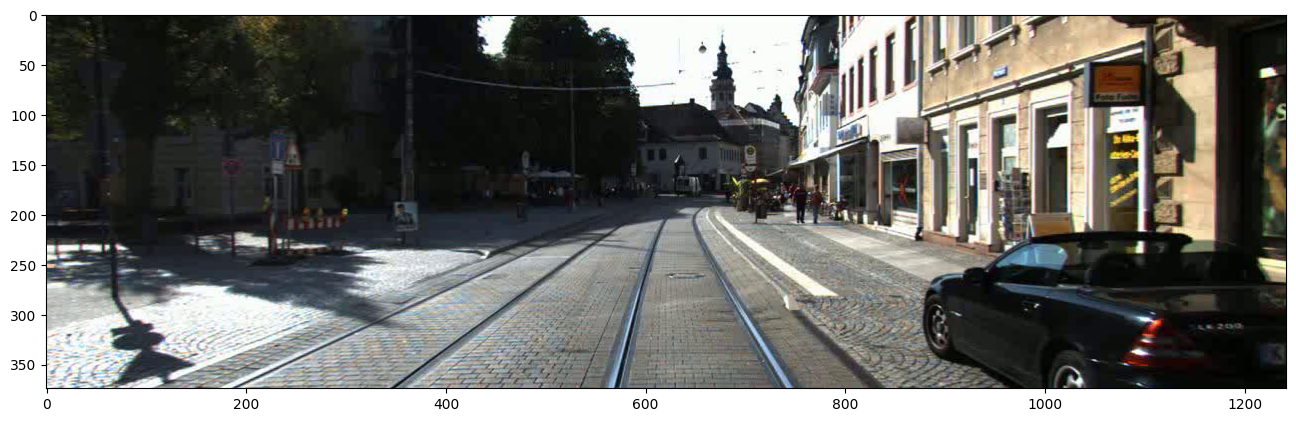

In [ ]:
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=2, text_thickness=2, text_scale=1)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model(frame)
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)
# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, tracker_id
    in detections
]
# annotate and display frame
frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)

%matplotlib inline
show_frame_in_notebook(frame, (16, 16))

## Predict and annotate whole video 

In [ ]:
# settings
LINE_START = Point(50, 1500)
LINE_END = Point(3840-50, 1500)

TARGET_VIDEO_PATH = dataset_path+"Video/"+out_video_name.split("mp4")[0]+"-result.mp4" 

In [ ]:
VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=1242, height=374, fps=24, total_frames=340)

In [ ]:
from tqdm.notebook import tqdm

object_dict = {}
# create BYTETracker instance
byte_tracker = BYTETracker(BYTETrackerArgs())
# create VideoInfo instance
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create LineCounter instance
line_counter = LineCounter(start=LINE_START, end=LINE_END)
# create instance of BoxAnnotator and LineCounterAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=1)
line_annotator = LineCounterAnnotator(thickness=4, text_thickness=4, text_scale=1)

# open target video file
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    # loop over video frames
    for frame_number, frame in tqdm(enumerate(generator, start=0), total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame)
        print(results[0].boxes.xyxy.cpu().numpy().shape[0])
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
       )
        # filtering out detections with unwanted classes
        mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # tracking detections
        tracks = byte_tracker.update(
            output_results=detections2boxes(detections=detections),
            img_info=frame.shape,
            img_size=frame.shape
        )
        
        tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
        if len(tracker_id)!=0:
          print("***",len(tracker_id))
        detections.tracker_id = np.array(tracker_id)
        # filtering out detections without trackers
        mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # format custom labels
        labels = [
            f"#{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
        ]
        # updating line counter
        line_counter.update(detections=detections)
        # annotate and display frame
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
        line_annotator.annotate(frame=frame, line_counter=line_counter)
        sink.write_frame(frame)

        my_ids = detections.tracker_id
        my_bounding_boxes = detections.xyxy

        for i in range(len(my_ids)):
            object_dict[(frame_number, my_ids[i])] = my_bounding_boxes[i]


  0%|          | 0/340 [00:00<?, ?it/s]


0: 160x512 (no detections), 313.1ms
Speed: 1.9ms preprocess, 313.1ms inference, 5.9ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 198.8ms
Speed: 1.7ms preprocess, 198.8ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 362.5ms
Speed: 1.6ms preprocess, 362.5ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 511.3ms
Speed: 2.6ms preprocess, 511.3ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 512)

0: 160x512 (no detections), 164.4ms


(0, 4)


Speed: 1.6ms preprocess, 164.4ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 210.6ms
Speed: 1.6ms preprocess, 210.6ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 315.5ms
Speed: 1.5ms preprocess, 315.5ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 290.4ms
Speed: 2.1ms preprocess, 290.4ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 1 object, 365.6ms
Speed: 1.5ms preprocess, 365.6ms inference, 2.7ms postprocess per image at shape (1, 3, 512, 512)



(1, 4)


0: 160x512 (no detections), 355.6ms
Speed: 4.0ms preprocess, 355.6ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 376.5ms
Speed: 1.8ms preprocess, 376.5ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 382.1ms
Speed: 2.5ms preprocess, 382.1ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 1 object, 306.8ms
Speed: 1.7ms preprocess, 306.8ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)



(1, 4)


0: 160x512 2 objects, 271.7ms
Speed: 1.5ms preprocess, 271.7ms inference, 8.5ms postprocess per image at shape (1, 3, 512, 512)



(2, 4)


0: 160x512 1 object, 395.2ms
Speed: 1.9ms preprocess, 395.2ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)



(1, 4)


0: 160x512 1 object, 365.1ms
Speed: 1.9ms preprocess, 365.1ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)

0: 160x512 1 object, 126.6ms
Speed: 2.1ms preprocess, 126.6ms inference, 0.9ms postprocess per image at shape (1, 3, 512, 512)



(1, 4)
(1, 4)


0: 160x512 1 object, 118.8ms
Speed: 1.6ms preprocess, 118.8ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)

0: 160x512 2 objects, 134.6ms
Speed: 1.9ms preprocess, 134.6ms inference, 0.9ms postprocess per image at shape (1, 3, 512, 512)



(1, 4)
(2, 4)


0: 160x512 2 objects, 120.9ms
Speed: 3.2ms preprocess, 120.9ms inference, 0.9ms postprocess per image at shape (1, 3, 512, 512)

0: 160x512 2 objects, 123.9ms
Speed: 2.0ms preprocess, 123.9ms inference, 0.9ms postprocess per image at shape (1, 3, 512, 512)



(2, 4)
(2, 4)


0: 160x512 3 objects, 127.5ms
Speed: 1.8ms preprocess, 127.5ms inference, 0.9ms postprocess per image at shape (1, 3, 512, 512)

0: 160x512 2 objects, 138.0ms
Speed: 1.4ms preprocess, 138.0ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)



(3, 4)
(2, 4)


0: 160x512 2 objects, 182.1ms
Speed: 1.5ms preprocess, 182.1ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)



(2, 4)


0: 160x512 2 objects, 195.9ms
Speed: 1.5ms preprocess, 195.9ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)



(2, 4)


0: 160x512 2 objects, 202.2ms
Speed: 1.5ms preprocess, 202.2ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)



(2, 4)


0: 160x512 2 objects, 210.4ms
Speed: 1.5ms preprocess, 210.4ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)



(2, 4)


0: 160x512 2 objects, 194.3ms
Speed: 1.5ms preprocess, 194.3ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)



(2, 4)


0: 160x512 2 objects, 206.7ms
Speed: 1.5ms preprocess, 206.7ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)



(2, 4)


0: 160x512 1 object, 199.9ms
Speed: 1.5ms preprocess, 199.9ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 512)



(1, 4)
*** 1


0: 160x512 (no detections), 194.5ms
Speed: 1.4ms preprocess, 194.5ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 192.2ms
Speed: 1.5ms preprocess, 192.2ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 191.2ms
Speed: 1.5ms preprocess, 191.2ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 194.3ms
Speed: 1.5ms preprocess, 194.3ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 199.1ms
Speed: 1.6ms preprocess, 199.1ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 221.0ms
Speed: 1.5ms preprocess, 221.0ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 201.6ms
Speed: 1.7ms preprocess, 201.6ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 190.4ms
Speed: 2.0ms preprocess, 190.4ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 200.3ms
Speed: 3.2ms preprocess, 200.3ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 201.8ms
Speed: 2.2ms preprocess, 201.8ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 205.2ms
Speed: 1.5ms preprocess, 205.2ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 203.4ms
Speed: 1.6ms preprocess, 203.4ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 209.1ms
Speed: 1.6ms preprocess, 209.1ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 210.4ms
Speed: 2.3ms preprocess, 210.4ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


0: 160x512 (no detections), 195.9ms
Speed: 1.5ms preprocess, 195.9ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 512)

0: 160x512 1 object, 171.1ms
Speed: 1.5ms preprocess, 171.1ms inference, 0.9ms postprocess per image at shape (1, 3, 512, 512)


(0, 4)
(1, 4)



0: 160x512 1 object, 123.5ms
Speed: 2.0ms preprocess, 123.5ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 512)

0: 160x512 2 objects, 133.2ms
Speed: 1.5ms preprocess, 133.2ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 512)



(1, 4)
(2, 4)


0: 160x512 (no detections), 123.7ms
Speed: 1.5ms preprocess, 123.7ms inference, 0.4ms postprocess per image at shape (1, 3, 512, 512)



(0, 4)


KeyboardInterrupt: ignored

##writing ground truth to a file

In [ ]:
file_gt_path = dataset_path+'gt/gt.txt'
file_pathss = dataset_path+"gt_path.txt"
frame_dict = {}

with open(file_gt_path, 'r') as file:
    for line in file:
        data = line.strip().split(',')
        frame_number = int(data[0])
        object_id = int(data[1])
        bb_left = float(data[2])
        bb_top = float(data[3])
        bb_width = float(data[4])
        bb_height = float(data[5])

        if frame_number not in frame_dict:
            frame_dict[frame_number] = []

        frame_dict[frame_number].append((object_id, bb_left, bb_top, bb_width, bb_height))

with open(file_pathss, "w") as file:
    for frame_number, objects in frame_dict.items():
        for obj in objects:
            object_id, bb_left, bb_top, bb_width, bb_height = obj
            bb_right = bb_left + bb_width
            bb_bottom = bb_top + bb_height
            print(f"{frame_number}, {object_id}, {bb_left:.2f}, {bb_top:.2f}, {bb_right:.2f}, {bb_bottom:.2f}")
            file.write(f"{frame_number}, {object_id}, {bb_left:.2f}, {bb_top:.2f}, {bb_right:.2f}, {bb_bottom:.2f}\n")

# Read the content from the file
with open(dataset_path+'gt_path.txt', 'r') as file:
    content = file.readlines()

# Remove leading/trailing whitespaces and split each line by comma
data = [line.strip().split(',') for line in content]

# Creating the dictionary
gt_dct = {}

# Populating the dictionary
for row in data:
    frame = int(row[0].strip())
    id = int(row[1].strip())
    bbox = [float(val.strip()) for val in row[2:]]

    # Check if the frame exists in the dictionary
    if frame not in gt_dct:
        gt_dct[frame] = {}

    # Check if the ID exists in the frame
    if id not in gt_dct[frame]:
        gt_dct[frame][id] = []

    # Append the bounding box to the ID in the frame
    gt_dct[frame][id].append(bbox)

# Removing the double brackets
for frame in gt_dct:
    for id in gt_dct[frame]:
        gt_dct[frame][id] = gt_dct[frame][id][0]

# Accessing dictionary elements
print(gt_dct)

print(gt_dct[frame])

6, 1, 750.00, 166.00, 771.12, 214.31
6, 2, 772.00, 168.00, 790.02, 214.19
7, 1, 756.00, 165.00, 774.33, 214.87
7, 2, 775.00, 168.00, 786.33, 215.72
8, 1, 758.00, 164.00, 777.18, 215.54
8, 2, 780.00, 167.00, 794.10, 216.34
9, 1, 761.00, 164.00, 780.33, 217.32
9, 2, 786.00, 166.00, 802.33, 217.08
10, 1, 765.00, 163.00, 785.06, 218.22
10, 2, 790.00, 165.00, 808.41, 217.95
11, 1, 769.00, 162.00, 789.00, 219.27
11, 2, 794.00, 164.00, 813.67, 218.96
12, 1, 773.00, 160.00, 796.13, 219.49
12, 2, 801.00, 163.00, 821.30, 220.12
13, 1, 779.00, 160.00, 804.33, 221.89
13, 2, 808.00, 163.00, 828.00, 222.45
13, 4, 201.00, 165.00, 219.00, 222.39
14, 1, 786.00, 161.00, 813.33, 225.49
14, 2, 817.00, 163.00, 838.52, 224.98
14, 4, 187.00, 167.00, 207.40, 225.97
15, 1, 793.00, 162.00, 821.00, 229.32
15, 2, 826.00, 165.00, 848.00, 229.74
15, 4, 172.00, 168.00, 194.33, 228.65
16, 1, 801.00, 164.00, 832.67, 234.44
16, 2, 836.00, 166.00, 861.48, 233.76
16, 4, 156.00, 170.00, 179.22, 232.42
17, 1, 809.00, 165.0

##writing detection to a file

In [ ]:
formatted_objects = []
det_path = dataset_path+'det_path.txt'

for key, value in object_dict.items():
    frame, obj_id = key
    bbox_values = ', '.join(map(str, value))
    formatted_objects.append(f"{frame}, {obj_id}, {bbox_values}")

with open(det_path, "w") as file:
    for formatted_object in formatted_objects:
        print(formatted_object)
        file.write(formatted_object + "\n")

29, 23, 1158.0209, 141.65704, 1231.6244, 335.32678
80, 40, 1210.1691, 159.99171, 1242.0, 324.41385
84, 46, 15.531823, 158.19127, 76.4763, 324.2493
96, 46, 20.74336, 165.12697, 81.70913, 355.21527
127, 79, 254.31422, 178.14911, 316.2967, 321.96725
128, 79, 222.51727, 178.82465, 287.19913, 336.81125
129, 79, 180.64656, 181.30621, 258.90622, 353.08072
130, 79, 130.22849, 182.7966, 216.21812, 371.04095
256, 105, 262.16846, 168.14417, 325.23767, 332.16507
256, 107, 747.95184, 164.08882, 771.80334, 250.05167
257, 105, 230.26736, 165.54063, 300.28796, 349.22128
258, 105, 195.36574, 159.82637, 270.4431, 369.17532
258, 107, 744.7458, 159.38083, 766.7632, 259.16788
259, 105, 149.38283, 156.91382, 229.8415, 372.65784
259, 107, 754.1373, 158.47038, 781.96655, 260.53445
260, 116, 327.50656, 172.08424, 376.59015, 321.6295
260, 107, 762.6227, 154.44646, 797.0297, 262.4887
260, 118, 381.1757, 173.46007, 417.1887, 277.1368
261, 116, 303.15622, 167.0348, 361.30023, 337.6994
261, 118, 376.77988, 172.9142

In [ ]:
# Read the content from the file
with open(dataset_path+'det_path.txt', 'r') as file:
    content = file.readlines()

# Remove leading/trailing whitespaces and split each line by comma
data = [line.strip().split(',') for line in content]

# Creating the dictionary
det_dct = {}

# Populating the dictionary
for row in data:
    frame = int(row[0].strip())
    id = int(row[1].strip())
    bbox = [float(val.strip()) for val in row[2:]]

    # Check if the frame exists in the dictionary
    if frame not in det_dct:
        det_dct[frame] = {}

    # Check if the ID exists in the frame
    if id not in det_dct[frame]:
        det_dct[frame][id] = []

    # Append the bounding box to the ID in the frame
    det_dct[frame][id].append(bbox)

# Removing the double brackets
for frame in det_dct:
    for id in det_dct[frame]:
        det_dct[frame][id] = det_dct[frame][id][0]

# Accessing dictionary elements
print(det_dct)

print(det_dct[6])

{29: {23: [1158.0209, 141.65704, 1231.6244, 335.32678]}, 80: {40: [1210.1691, 159.99171, 1242.0, 324.41385]}, 84: {46: [15.531823, 158.19127, 76.4763, 324.2493]}, 96: {46: [20.74336, 165.12697, 81.70913, 355.21527]}, 127: {79: [254.31422, 178.14911, 316.2967, 321.96725]}, 128: {79: [222.51727, 178.82465, 287.19913, 336.81125]}, 129: {79: [180.64656, 181.30621, 258.90622, 353.08072]}, 130: {79: [130.22849, 182.7966, 216.21812, 371.04095]}, 256: {105: [262.16846, 168.14417, 325.23767, 332.16507], 107: [747.95184, 164.08882, 771.80334, 250.05167]}, 257: {105: [230.26736, 165.54063, 300.28796, 349.22128]}, 258: {105: [195.36574, 159.82637, 270.4431, 369.17532], 107: [744.7458, 159.38083, 766.7632, 259.16788]}, 259: {105: [149.38283, 156.91382, 229.8415, 372.65784], 107: [754.1373, 158.47038, 781.96655, 260.53445]}, 260: {116: [327.50656, 172.08424, 376.59015, 321.6295], 107: [762.6227, 154.44646, 797.0297, 262.4887], 118: [381.1757, 173.46007, 417.1887, 277.1368]}, 261: {116: [303.15622, 1

KeyError: ignored

In [ ]:
!pip install motmetrics
import motmetrics as mm
# List all default metrics
mh = mm.metrics.create()
print(mh.list_metrics_markdown())

#Evaluate Bytetrack

In [ ]:
#for frame_ids in gt_dct.keys():
#gt_id = gt_dct[frame_ids].keys()
#det_id = det_dct[frame_ids].keys()
#print(gt_id) 

def iou(box1, box2):
    """
    Compute the Intersection over Union (IOU) of two bounding boxes in TLBR format.
    
    Arguments:
    box1 -- list or tuple containing the coordinates of the first box: [top_left_x, top_left_y, bottom_right_x, bottom_right_y]
    box2 -- list or tuple containing the coordinates of the second box: [top_left_x, top_left_y, bottom_right_x, bottom_right_y]
    
    Returns:
    iou -- Intersection over Union (IOU) value
    """
    
    # Extract coordinates from the bounding boxes
    top_left_x1, top_left_y1, bottom_right_x1, bottom_right_y1 = box1
    top_left_x2, top_left_y2, bottom_right_x2, bottom_right_y2 = box2
    
    # Calculate the coordinates of the intersection rectangle
    intersection_top_left_x = max(top_left_x1, top_left_x2)
    intersection_top_left_y = max(top_left_y1, top_left_y2)
    intersection_bottom_right_x = min(bottom_right_x1, bottom_right_x2)
    intersection_bottom_right_y = min(bottom_right_y1, bottom_right_y2)
    
    # Calculate the area of intersection
    intersection_width = max(0, intersection_bottom_right_x - intersection_top_left_x + 1)
    intersection_height = max(0, intersection_bottom_right_y - intersection_top_left_y + 1)
    intersection_area = intersection_width * intersection_height
    
    # Calculate the area of each bounding box
    box1_width = bottom_right_x1 - top_left_x1 + 1
    box1_height = bottom_right_y1 - top_left_y1 + 1
    box2_width = bottom_right_x2 - top_left_x2 + 1
    box2_height = bottom_right_y2 - top_left_y2 + 1
    
    box1_area = box1_width * box1_height
    box2_area = box2_width * box2_height
    
    # Calculate the Union area
    union_area = box1_area + box2_area - intersection_area
    
    # Calculate the IOU
    iou = intersection_area / union_area
    
    return iou

import motmetrics as mm
import numpy as np

# Create an accumulator that will be updated during each frame
acc = mm.MOTAccumulator(auto_id=True)

#print(gt_dct)
#print(det_dct)
for frame_id in gt_dct.keys():
  if frame_id in det_dct.keys():
    gt_id = list(gt_dct[frame_id].keys())
    dt_id= list(det_dct[frame_id].keys())
    transition_matrix=[]

    for id in gt_id:
      transition_matrix.append([iou(gt_dct[frame_id][id], det_dct[frame_id][x]) for x in dt_id] )
    
    #print(gt_id,                     # Ground truth objects in this frame
    #   dt_id,                  # Detector hypotheses in this frame
    #    transition_matrix)
    acc.update(
        gt_id,                     # Ground truth objects in this frame
        dt_id,                  # Detector hypotheses in this frame
        transition_matrix
    )
summary = mh.compute(acc, metrics=mm.metrics.motchallenge_metrics, name='acc')
print(summary)
